# Sprint 8, Task 1

## Level 1

### Exercise 1

Take a sports dataset you like and select an attribute. Calculate the p-value and check if it rejects the null hypothesis with an alpha of 5%:

In [1]:
import sqlite3
import pandas as pd

from scipy.stats import spearmanr
from scipy.stats import normaltest
from scipy.stats import kruskal
from matplotlib import pyplot as plt

In [2]:

sql = """
SELECT finishing, heading_accuracy, volleys, free_kick_accuracy, shot_power, long_shots, penalties
FROM PLAYER_ATTRIBUTES
"""

con = sqlite3.connect("database.sqlite")

In [3]:
attributes = pd.read_sql_query(sql, con)

attributes.dropna(inplace = True)

In [4]:
# With this test we test for normal distribution in finishing score data 

stat, p = normaltest(attributes["finishing"])

print(f"The p-value is: {p}")
print("""Since it is smaller than the alpha level (0.05), we reject the null hypothesis. In the case of the
      D’Agostino K^2 test implies that the data distribution is not normal""")

The p-value is: 0.0
Since it is smaller than the alpha level (0.05), we reject the null hypothesis. In the case of the
      D’Agostino K^2 test implies that the data distribution is not normal


(array([ 2054.,  9470., 23726., 21473., 22219., 29002., 41273., 24212.,
         7139.,   697.]),
 array([ 1. , 10.6, 20.2, 29.8, 39.4, 49. , 58.6, 68.2, 77.8, 87.4, 97. ]),
 <BarContainer object of 10 artists>)

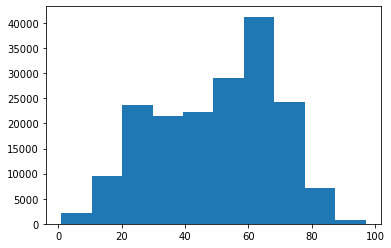

In [5]:
# Visual demonstration of non-normal distribution:

plt.hist(attributes["finishing"])

## Level 2

### Exercise 2

Continue with the same dataset and select two attributes. Calculate the p-value and check if it rejects the null hypothesis with an alpha of 5%:


In [6]:
# Calculate Spearman rho

stat, p = spearmanr(attributes["finishing"], attributes["volleys"])

print(f"The p-value is: {p}")

print("""
Since it is smaller than the alpha level (0.05), we reject the null hypothesis. In the case of Spearman it implies
that a correlation between the two elements is quite likely""")

print(f"Specifically, the correlation is {stat}, which implies a strong, positive correlation.")


The p-value is: 0.0

Since it is smaller than the alpha level (0.05), we reject the null hypothesis. In the case of Spearman it implies
that a correlation between the two elements is quite likely
Specifically, the correlation is 0.8368909900705522, which implies a strong, positive correlation.


## Level 3

### Exercise 3

Continue with the same dataset and select three attributes. Calculate the p-value and check if it rejects the null hypothesis with an alpha of 5%:

In [7]:
# For the 3 variables analysis I would have liked to analyse whether the means of different attributes are 
# significantly better through an ANOVA analysis. However, the variables in this dataset are not normally 
# distributed. Hence, a Kruskal-Wallis H test will prove more useful, since it will compare the distribution of 
# more than one sample


stat, p = kruskal(attributes["finishing"], attributes["volleys"], attributes["free_kick_accuracy"])

print(f"The p-value is: {p}")

print("""
Since it is smaller than the alpha level (0.05), we reject the null hypothesis.  In the case of the Kruskal-Wallis
H test it implies that the three samples have different distributions with a high degree of certainty""")


The p-value is: 5.864570183546127e-48

Since it is smaller than the alpha level (0.05), we reject the null hypothesis.  In the case of the Kruskal-Wallis
H test it implies that the three samples have different distributions with a high degree of certainty
